#Description

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

##Objective
To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

##Data Description
The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

##Data Dictionary
S.No.: Serial number

Name: Name of the car which includes brand name and model name

Location: Location in which the car is being sold or is available for purchase (cities)

Year: Manufacturing year of the car

Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km

Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)

Transmission: The type of transmission used by the car (Automatic/Manual)

Owner: Type of ownership

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in CC

Power: The maximum power of the engine in bhp

Seats: The number of seats in the car

New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)

Price: The price of the used car in INR Lakhs

--------------------------------------------

###Author: Alishan Premani
###Date:   08/29/2022


In [578]:
%%shell 
jupyter nbconvert --to html ///content/Project_2_Premani.ipynb

[NbConvertApp] Converting notebook ///content/Project_2_Premani.ipynb to html
[NbConvertApp] Writing 1049152 bytes to ///content/Project_2_Premani.html


In [163]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [298]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

# Removes limit for number of displayed columns
pd.set_option("display.max_columns", None)
# Sets limit for number of displayed rows
pd.set_option("display.max_rows", 50)

# for splitting data into train and test
from sklearn.model_selection import train_test_split

# for building linear regression model
from sklearn.linear_model import LinearRegression

# for checking performance of model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [484]:
# read in file into data frame
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/used_cars_data.csv')
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

np.random.seed(1)
df.sample(n=10)

There are 7253 rows and 14 columns.


,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


In [485]:
# checking shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 7253 rows and 14 columns.


By looking at this data, we can safely drop the S. No. column, since we won't be using it. We can see that some columns that should be numeric are strings, such as Mileage, Engine and Power. We will need to convert those to numeric. 

In [486]:
# get make of vehicle from name, making sure to strip leading and tailing white space
df['Make'] = df['Name'].str.strip().str.split(' ').apply(lambda x: x[0])
np.random.seed(1)
df['Make'].sample(n=10)

2397             Ford
3777           Maruti
4425             Ford
3661    Mercedes-Benz
4514          Hyundai
599            Toyota
186     Mercedes-Benz
305              Audi
4582          Hyundai
5434            Honda
Name: Make, dtype: object

In [487]:
df.drop(['S.No.'], axis=1, inplace=True)

In [488]:
# Checking for duplicate rows
df[ df.duplicated(keep = False)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,13.58,NaN,Honda
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,13.58,NaN,Honda


In [489]:
# We drop one of these rows
df.drop( index= 6582, axis=1, inplace=True)

# Exploratory Data Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
 13  Make               7252 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 849.8+ KB


Out of 7252 entries, we can see that some columns have missing information. 

We can drop NaN values in the used price 'price' column since that is our target column. 

In [490]:
df.dropna(subset=['Price'], inplace=True)

In [491]:
# reset the index
df.reset_index(inplace=True, drop=True)

In [492]:
# Which columns have most missing values
df.isnull().sum().sort_values(ascending=False)

Power                143
Seats                 42
Engine                36
Mileage                2
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
New_Price              0
Price                  0
Make                   0
dtype: int64

Power has the most missing entries. I would like to get a better understanding of what missing values look like in all these columns, and if there is a pattern to them. 

In [493]:
df[df.Mileage.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75,Toyota


In [494]:
df[df['Fuel_Type']=='Electric']

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72 CC,41 bhp,5.0,13.58,13.00,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798 CC,73 bhp,5.0,24.01,12.75,Toyota


Since Electric cars don't have mileage, it is fitting that their Mileage values are NaN, which happen to be the two values that are "missing" as we saw above. Seems that we don't have to be concerned with these NaN values as they are appropriate.

In [495]:
df[df.Engine.isnull()].sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4229,Hyundai Santro Xing XG,Bangalore,2005,79000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN,4.55,1.65,Hyundai
4577,BMW 5 Series 520d Sedan,Delhi,2012,72000,Diesel,Automatic,Third,18.48 kmpl,NaN,NaN,NaN,67.87,13.85,BMW
3810,Honda CR-V AT With Sun Roof,Kolkata,2013,27000,Petrol,Automatic,First,14.0 kmpl,NaN,NaN,NaN,33.51,11.99,Honda
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,16.1 kmpl,NaN,NaN,NaN,7.88,1.75,Maruti
4712,Hyundai Santro Xing XG,Pune,2003,80000,Petrol,Manual,Second,17.0 kmpl,NaN,NaN,NaN,4.55,0.90,Hyundai
5185,Maruti Swift 1.3 LXI,Delhi,2012,52000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.88,3.65,Maruti
3522,Hyundai Santro GLS II - Euro II,Kochi,2012,66400,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,4.55,2.66,Hyundai
4011,Fiat Punto 1.3 Emotion,Pune,2011,45271,Diesel,Manual,First,20.3 kmpl,NaN,NaN,NaN,8.60,2.60,Fiat
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.88,1.60,Maruti
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,12.8 kmpl,NaN,NaN,NaN,13.58,3.20,Honda


In [496]:
df[df.Power.isnull()].sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
5119,Hyundai Santro Xing XP,Kolkata,2008,45500,Petrol,Manual,Second,0.0 kmpl,1086 CC,NaN,5.0,4.55,1.17,Hyundai
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,67.87,17.89,BMW
2579,Hyundai Santro Xing XG eRLX Euro III,Mumbai,2006,50888,Petrol,Manual,First,17.0 kmpl,1086 CC,NaN,5.0,4.55,1.15,Hyundai
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.88,1.60,Maruti
2501,Maruti Swift VDI BSIV,Hyderabad,2016,51787,Diesel,Manual,First,17.8 kmpl,1248 CC,NaN,5.0,7.88,6.45,Maruti
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN,7.88,3.15,Maruti
424,Volkswagen Jetta 2007-2011 1.9 L TDI,Hyderabad,2010,42021,Diesel,Manual,First,0.0 kmpl,1968 CC,NaN,5.0,10.15,5.45,Volkswagen
4900,Hyundai Santro Xing XL AT eRLX Euro III,Hyderabad,2007,71000,Petrol,Automatic,First,17.0 kmpl,1086 CC,NaN,5.0,4.55,2.40,Hyundai
3033,Hyundai Santro Xing XP,Jaipur,2005,120000,Petrol,Manual,First,0.0 kmpl,1086 CC,NaN,5.0,4.55,1.15,Hyundai
2640,Maruti Swift VDI BSIV,Pune,2007,121000,Diesel,Manual,Second,17.8 kmpl,1248 CC,NaN,5.0,7.88,2.35,Maruti


Mileage can be either NaN or 0.0, both of which can be grouped under the term "missing values," since no car gives 0.0 mileage. We can look at how many cars have a Mileage value of 0.0 later to get a sense of how to deal with them.

It seems that when Engine is NaN, there might be a pattern where Power and Seats are NaN. Let's investigate this further. 

## Converting Mileage, Engine and Power columns to float

These are columns that represent the miles the car has driven, the volume of the engine, and the maximum power of the engine. They all end in units km/kg or kmpl, CC, and bhp respectively. We will convert these into floats by removing these units.

In [497]:
for col_name in ['Mileage','Engine','Power']:
  df[col_name] =  df[col_name].str.strip().str.split().str.get(0).astype('float')

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
 13  Make               6019 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 658.5+ KB


In [499]:
# statistical summary
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,6019,1876,Mahindra XUV500 W8 2WD,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6017.0,NaN,NaN,NaN,18.134961,4.582289,0.0,15.17,18.15,21.1,33.54
Engine,5983.0,NaN,NaN,NaN,1621.27645,601.355233,72.0,1198.0,1493.0,1984.0,5998.0
Power,5876.0,NaN,NaN,NaN,113.25305,53.874957,34.2,75.0,97.7,138.1,560.0


## Dealing with Missing values

In [500]:
def display_missing(df):
  cond1 = (df.dtypes == 'float64') + (df.dtypes == 'int64') # selecting float columns
  cond2 = df.isnull().sum() > 0  # selecting columns with NaN values
  cond_ = np.logical_and(cond1.values, cond2.values)

  for col_name in df.columns[cond1.values]:
    a = df[col_name].apply(lambda x: x == 0).sum()
    b = df[col_name].isnull().sum()
    print(f"{col_name} has {b} NaN values and {a} zero values ")

display_missing(df)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 68 zero values 
Engine has 36 NaN values and 0 zero values 
Power has 143 NaN values and 0 zero values 
Seats has 42 NaN values and 1 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


68 values of Mileage are 0.0 and 1 value of seats has a value of 0. None of the int type columns have 0 or NaN values.

### Dealing with NaN Values

Let's check if some NaN values of Engine, Power, Seats and zero values of Mileage can be found by the Name column. We know there are some Name duplicates; if there are cars that have those values already filled in, then we can impute those to the respective cars that don't have values of Engine, Power, Seats, and/or Mileage.

In [501]:
# checking for name duplicates for columns with NaN values
print( f"NaN valued Engine car names are duplicated {df[ df['Engine'].isnull() ][['Name']].duplicated().sum()} times." )
print( f"NaN valued Power car names are duplicated {df[ df['Power'].isnull() ][['Name']].duplicated().sum()} times." )
print( f"NaN valued Seats car names are duplicated {df[ df['Seats'].isnull() ][['Name']].duplicated().sum()} times." )

NaN valued Engine car names are duplicated 17 times.
NaN valued Power car names are duplicated 73 times.
NaN valued Seats car names are duplicated 19 times.


Perhaps there is merit in following the above method of imputation, as it would increse model accuracy than just imputing the median of the respective columns.

In [502]:
# Look at missing values
display_missing(df)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 68 zero values 
Engine has 36 NaN values and 0 zero values 
Power has 143 NaN values and 0 zero values 
Seats has 42 NaN values and 1 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


In [503]:
df2 = df.copy()

def impute_from_within(df,col_name):
  # first we get list of unique car names where col_name value(s) is/are NaN
  cars_missing = df['Name'][df[col_name].isnull()].unique()

  # for each car in the above list, get the col_name value(s) for the car with non-NaN values, and impute into NaN indices
  for car in cars_missing:
    # array of wherever this car's col_name values are not NaN
    bool_array = np.isnan( df[df['Name'] == car][col_name] ) == False

    # if at least one car in the list has non-NaN value, then impute that value into the indices where col_name value is NaN
    if bool_array.any() == True:
      notNaN_ind = np.where(np.isnan( df[df['Name'] == car][col_name] ) == False)[0]
      NaN_ind    = np.where(np.isnan( df[df['Name'] == car][col_name] ))[0]
      row_ind    = df[df['Name'] == car][col_name].index

      if np.size(notNaN_ind) == 1:
        ind = notNaN_ind
      elif np.size(notNaN_ind) > 1:
        ind = notNaN_ind[0]
      else:
        ind = notNaN_ind
        continue

      # get and impute Seats value
      num_seats = df[col_name].iloc[row_ind].iloc[ind]
      df.loc[row_ind[NaN_ind],col_name] = num_seats 

impute_from_within(df2, 'Seats')
impute_from_within(df2, 'Power')
impute_from_within(df2, 'Engine')

In [504]:
# Look at missing values
display_missing(df2)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 68 zero values 
Engine has 33 NaN values and 0 zero values 
Power has 115 NaN values and 0 zero values 
Seats has 38 NaN values and 1 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


We were able to correctly impute a portion of the NaN values for each of Engine, Power and Seats columns - this will improve model accuracy. For the rest of the NaN values, we will impute the values for each column by the Make column's median respectively.

In [505]:
df3 = df2.copy()
df3[['Seats', 'Engine','Power']] = df3.groupby(['Make'])[['Seats', 'Engine','Power']].transform(lambda x: x.fillna(x.median())) 

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [506]:
display_missing(df3)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 68 zero values 
Engine has 0 NaN values and 0 zero values 
Power has 1 NaN values and 0 zero values 
Seats has 0 NaN values and 1 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


In [507]:
df3['Make'].value_counts()

Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini               26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Smart               1
Ambassador          1
Isuzu               1
Bentley             1
Lamborghini         1
Name: Make, dtype: int64

Since there are Makes that have only one car in this data, the Power column still has 1 NaN value remaining - we will impute the entire data's Power median for that below.

In [508]:
index1 = df3[ df3.Power.isnull() ].index[0]
print(index1)
df3[ df3.Power.isnull() ]

915


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,NaN,2.0,11.3,3.0,Smart


In [509]:
df3.loc[index1,'Power'] = df3['Power'].median()
del index1 # deleting for memory usage

In [510]:
display_missing(df3)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 68 zero values 
Engine has 0 NaN values and 0 zero values 
Power has 0 NaN values and 0 zero values 
Seats has 0 NaN values and 1 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


### Dealing with 0 values
Since Seats has only one value that is 0, let's quickly deal with that before diving into dealing with Mileage's 0 values

In [511]:
df3[df3['Seats'].apply(lambda x: x == 0)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
3999,Audi A4 3.2 FSI Tiptronic Quattro,Hyderabad,2012,125000,Petrol,Automatic,First,10.5,3197.0,174.33,0.0,53.14,18.0,Audi


We know that Audi A4 3.2 FSI Tiptronic Quattro gas 5 seats, so we can replace this value by 5.

In [512]:
df3.loc[3999,'Seats'] = 5

In [513]:
display_missing(df3)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 68 zero values 
Engine has 0 NaN values and 0 zero values 
Power has 0 NaN values and 0 zero values 
Seats has 0 NaN values and 0 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


Let's try to impute Mileage's values from within. First, let's look at the duplicates

In [514]:
print( f"{df3[ df3['Mileage'].apply(lambda x: x == 0) ][['Name']].duplicated().sum()} car names are duplicated with Mileage = 0.0." )

35 car names are duplicated with Mileage = 0.0.


In [515]:
df3[ df3['Mileage'].apply(lambda x: x == 0) ]['Name'].unique().shape

(33,)

From 68 values that are zero, 33 car names are unique.

In [516]:
df4 = df3.copy()

def impute_from_within_zero(df,col_name):
  # first we get list of unique car names where col_name value(s) is/are zero
  cars_missing = df[df[col_name].apply(lambda x: x == 0) ]['Name'].unique()

  # for each car in the above list, get the col_name value(s) for the car with non-zero values, and impute into zero indices
  for car in cars_missing:
    # array of wherever this car's col_name values are not zero
    bool_array = df[df['Name'] == car][col_name].apply(lambda x: x == 0) == False

    # if at least one car in the list has non-zero value, then impute that value into the indices where col_name value is zero
    if bool_array.any() == True:
      notZero_ind = np.where( df[df['Name'] == car][col_name].apply(lambda x: x == 0) == False)[0]
      zero_ind    = np.where( df[df['Name'] == car][col_name].apply(lambda x: x == 0) )[0]
      row_ind     = df[df['Name'] == car][col_name].index

      if np.size(notZero_ind) == 1:
        ind = notZero_ind
      elif np.size(notZero_ind) > 1:
        ind = notZero_ind[0]

      # get and impute Seats value
      imp_value = df[col_name].iloc[row_ind].iloc[ind]
      df.loc[row_ind[zero_ind],col_name] = imp_value 

impute_from_within_zero(df4, 'Mileage')
display_missing(df4)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 65 zero values 
Engine has 0 NaN values and 0 zero values 
Power has 0 NaN values and 0 zero values 
Seats has 0 NaN values and 0 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


We see that we were successfully only able to impute 68-65=3 values accurately. We can impute the rest with each car's Make's median value.

In [520]:
df5 = df4.copy()

carMakes = df5.groupby(['Make'])['Mileage'].median().index
dict1 = df5.groupby(['Make'])['Mileage'].indices

for i,make in enumerate(carMakes):
  ind = df5.iloc[dict1[make]][ df5.iloc[dict1[make]]['Mileage'] == 0 ].index
  if np.size(ind) > 0:
    # get the median for the make
    med = df5.groupby(['Make'])['Mileage'].median()[i]
    print(f"For {make}, median = {med}, indices that have mileage = 0 are:")
    print(f"{ind}\n")
    # impute the median for all zero values
    df5.loc[ind,'Mileage'] = med

display_missing(df5)

For Audi, median = 15.73, indices that have mileage = 0 are:
Int64Index([3093], dtype='int64')

For Fiat, median = 18.4, indices that have mileage = 0 are:
Int64Index([4629], dtype='int64')

For Ford, median = 18.88, indices that have mileage = 0 are:
Int64Index([229], dtype='int64')

For Hyundai, median = 18.9, indices that have mileage = 0 are:
Int64Index([  79,  262,  307,  443,  631,  647,  996, 1059, 1271, 1354, 1419,
            1857, 2096, 2130, 2343, 2542, 2597, 2780, 2842, 3033, 3044, 3061,
            3189, 3271, 3516, 3522, 3645, 4302, 5119, 5426, 5529, 5972],
           dtype='int64')

For Land, median = 12.63, indices that have mileage = 0 are:
Int64Index([14, 749, 1259, 1460, 4152, 4687, 5016, 5022, 5311], dtype='int64')

For Mahindra, median = 15.1, indices that have mileage = 0 are:
Int64Index([2053, 5943], dtype='int64')

For Maruti, median = 21.4, indices that have mileage = 0 are:
Int64Index([1345], dtype='int64')

For Mercedes-Benz, median = 14.21, indices that have

Since there are Makes that have only one car in this data, the Mileage column still has 1 NaN value remaining - we will impute the entire data's Mileage median for that below.

In [521]:
df5[df5.Mileage == 0]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
915,Smart Fortwo CDI AT,Pune,2008,103000,Diesel,Automatic,Second,0.0,799.0,93.7,2.0,11.3,3.0,Smart


In [522]:
df5.loc[915,'Mileage'] = df5['Mileage'].median()
df5.loc[915,'Mileage']

18.2

In [523]:
display_missing(df5)

Year has 0 NaN values and 0 zero values 
Kilometers_Driven has 0 NaN values and 0 zero values 
Mileage has 2 NaN values and 0 zero values 
Engine has 0 NaN values and 0 zero values 
Power has 0 NaN values and 0 zero values 
Seats has 0 NaN values and 0 zero values 
New_Price has 0 NaN values and 0 zero values 
Price has 0 NaN values and 0 zero values 


We are done processing missing values. Let's transition into Univariate and Bivariate Analyses.

## Univariate Analysis

In [524]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
 13  Make               6019 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 658.5+ KB


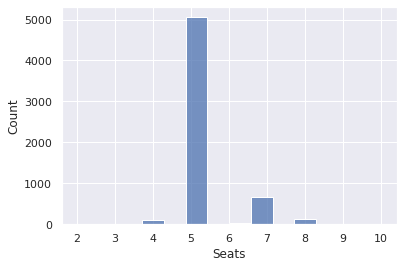

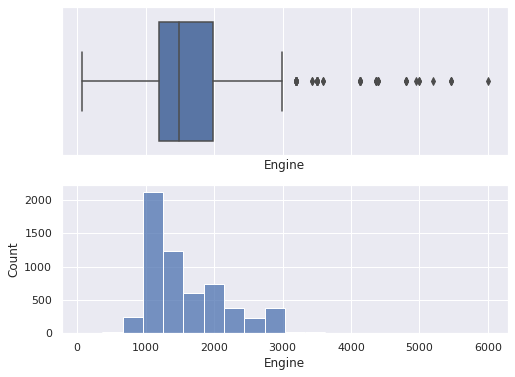

In [569]:
def box_hist_plot(df,col_name):
  f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2,sharex=True,figsize=(8,6))
  sns.boxplot(data=df, x=col_name, ax=ax_box2)
  sns.histplot(data=df, x=col_name, ax=ax_hist2, bins = 20)

sns.histplot(df5, x='Seats')
box_hist_plot(df5, 'Engine')

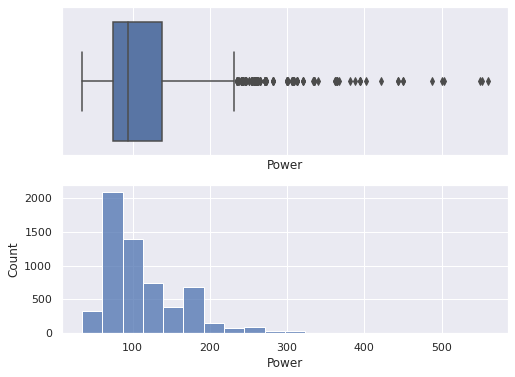

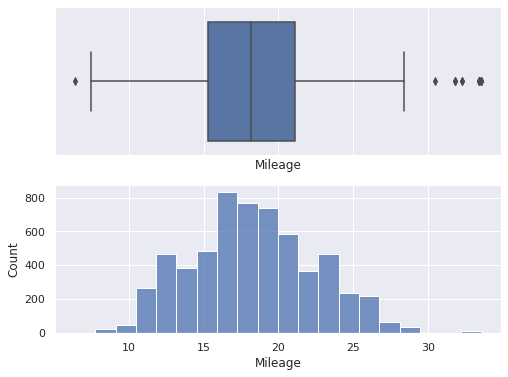

In [570]:
box_hist_plot(df5, 'Power')
box_hist_plot(df5, 'Mileage')

Most cars in the data set are 5 seat cars. Engine and Power both are right-skewed. Mileage seems to be about normally distributed.

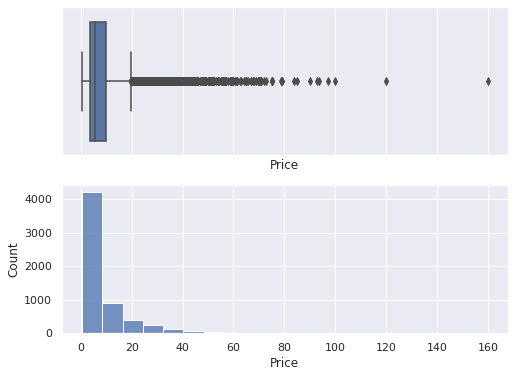

In [571]:
box_hist_plot(df5, 'Price')

(Used) Price is heavily right-skewed.

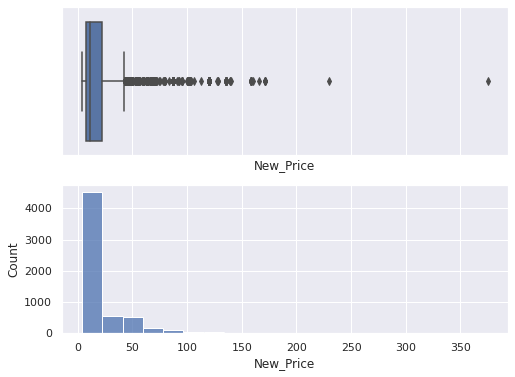

In [572]:
box_hist_plot(df5, 'New_Price')

New Price is also heavily right-skewed. A couple outliers on the far right must be explored.

In [528]:
df5[ df5['New_Price'] > 200 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.0,5.0,230.0,160.0,Land
5521,Bentley Continental Flying Spur,Hyderabad,2006,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,375.0,59.0,Bentley


Since Bentley is a high end brand, perhaps being such a high price is OK; a quick Google search validated this price. Let's explore the Land Rover make.

In [529]:
# Km Driven < 30k for Land Rovers
df5[ df5['Make'] == 'Land'][ df5[ df5['Make'] == 'Land']['Kilometers_Driven'] < 30000 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
480,Land Rover Range Rover Evoque 2.0 TD4 Pure,Delhi,2015,24000,Diesel,Automatic,Second,15.68,1999.0,177.00,5.0,120.00,33.50,Land
1505,Land Rover Range Rover Sport SE,Kochi,2019,26013,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,139.00,97.07,Land
2139,Land Rover Range Rover Evoque 2.0 TD4 Pure,Kochi,2016,29022,Diesel,Automatic,Second,15.68,1999.0,177.00,5.0,120.00,34.08,Land
3043,Land Rover Discovery Sport TD4 HSE,Coimbatore,2019,25899,Diesel,Automatic,First,12.63,2179.0,147.50,5.0,120.00,55.70,Land
4079,Land Rover Range Rover 3.0 Diesel LWB Vogue,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,230.00,160.00,Land
4925,Land Rover Discovery Sport TD4 S,Delhi,2017,22000,Diesel,Automatic,First,12.83,2179.0,147.50,5.0,120.00,35.00,Land
5038,Land Rover Discovery Sport TD4 HSE 7S,Coimbatore,2019,24013,Diesel,Automatic,First,12.81,1999.0,148.31,7.0,69.22,56.14,Land
5067,Land Rover Discovery Sport SD4 HSE Luxury 7S,Coimbatore,2019,17201,Diesel,Automatic,First,12.51,2179.0,187.70,7.0,120.00,58.91,Land


For the Land Rover that has a price of 160 INR Lakhs, none of the information in the other columns really justifies this high price, which is significantly larger than the other rovers. In the real world, this would warrant investigation. For now, we drop this row for model accuracy.

In [530]:
df6 = df5.drop(4079)

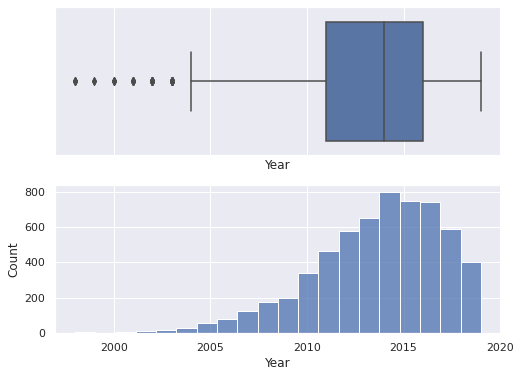

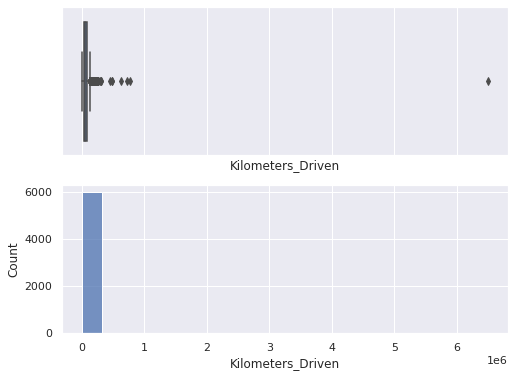

In [573]:
box_hist_plot(df5, 'Year')
box_hist_plot(df5, 'Kilometers_Driven')

Year is left-skewed, and Km_Driven is heavily right skewed because of an outlier. Let's explore this further.

In [532]:
df6[ df6['Kilometers_Driven'] > 5000000 ]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Make
2328,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,55.07,65.0,BMW


A quick Google search reveals that as of 2017, the world record for the longest driven car was 741,065 km, and as of 2019, the record is 4.8 million km, both values of which are still lower than the above car's Km_Driven of 6.5 million km. Perhaps a 0 was added to the number by mistake, but nonetheless, we will drop this row.

In [533]:
df6.drop(2328, inplace=True)

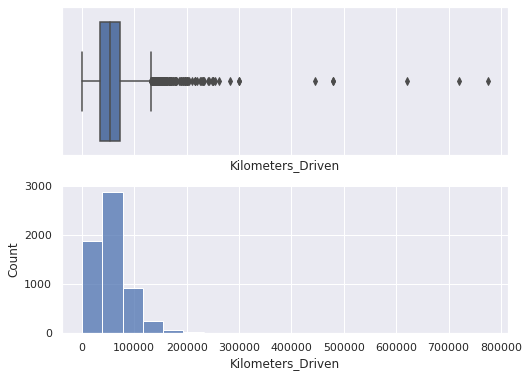

In [574]:
box_hist_plot(df6, 'Kilometers_Driven');

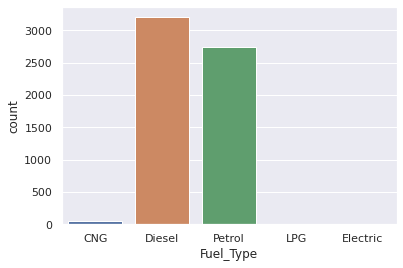

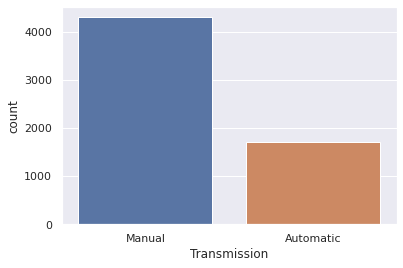

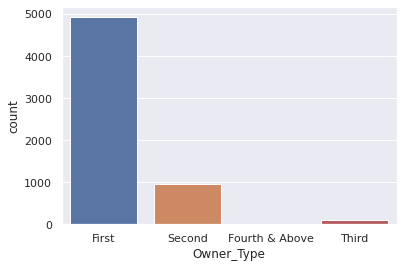

In [535]:
sns.countplot(data=df6, x='Fuel_Type'); plt.show()
sns.countplot(data=df6, x='Transmission'); plt.show()
sns.countplot(data=df6, x='Owner_Type'); plt.show()

Diesel and Petrol are the most popular fuel types. Manual is the dominant Transmission. Most cars are being sold by their First owner, and some from their second owner.

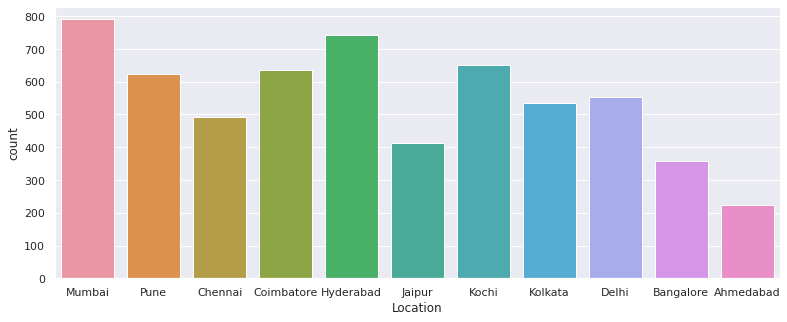

In [536]:
plt.figure(figsize=(13,5))
sns.countplot(data=df6, x='Location'); plt.show()

Locations are well spread out for the most part.

## Bivariate Analysis

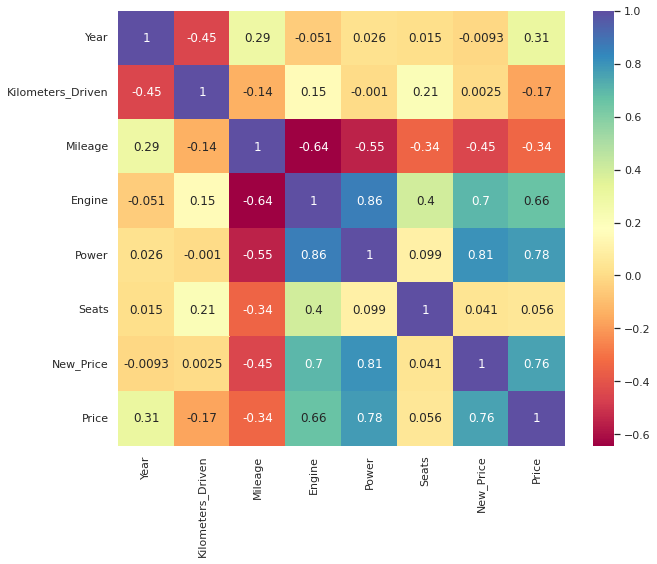

In [537]:
plt.figure(figsize=(10,8))
sns.heatmap(df6.corr(), annot=True, cmap = 'Spectral');

From the correlation heatmap, we see that:

- Year and Price have a positive correlation, 

- Km Driven and Price have a negative correlation,

- Price and New_Price have a strong positive correlation. 

- (Engine, Power, Seats, and both prices) have a strong negative correlation with Mileage  

- Engine has a strong correlation with (Power, Seats, and both prices)

- Engine and Power strongly positively correlate with both the prices

- Strong positive correlation between new and used price.

Let's look at some correlations between Used Price and other metrics.

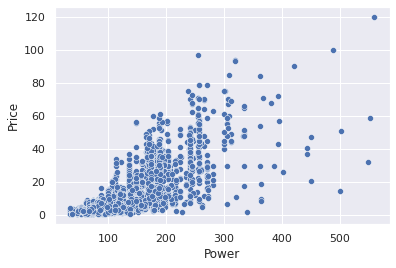

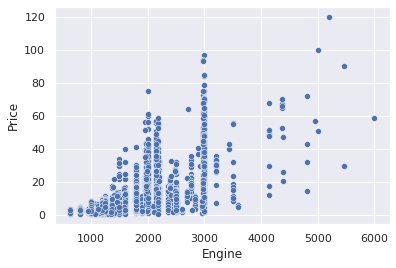

In [576]:
sns.scatterplot(data=df6, x='Power', y='Price'); plt.show()
sns.scatterplot(data=df6, x='Engine', y='Price'); plt.show()

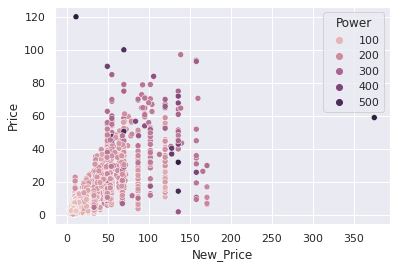

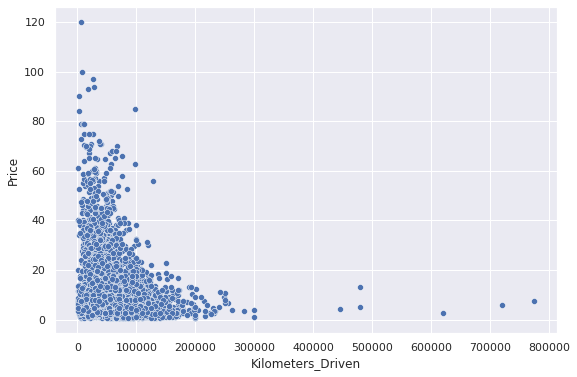

In [577]:
sns.scatterplot(data=df6, x='New_Price', y='Price', hue='Power'); plt.show()
plt.figure(figsize=(9,6));sns.scatterplot(data=df6, x='Kilometers_Driven', y='Price'); plt.show()

Categorical Columns vs Used Price:

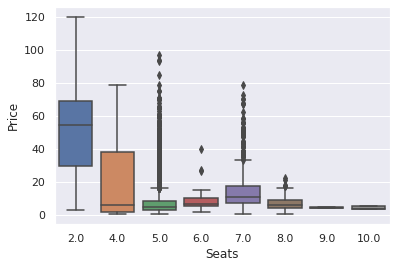

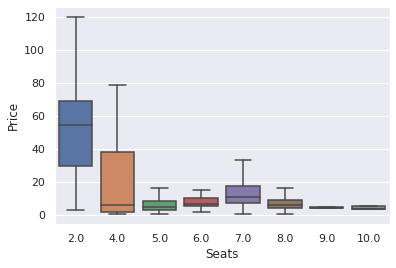

In [539]:
sns.boxplot(data=df6, x='Seats', y='Price'); plt.show()
sns.boxplot(data=df6, x='Seats', y='Price', showfliers = False); plt.show()

2 and 4 seater cars have higher ranges of used price. The 2 seater cars also have a higher average price, and 50% of the 2 seater cars are priced between 30 and 70 INR Lakhs. All other cars' prices average to be between 0 and 10 INR Lakhs.

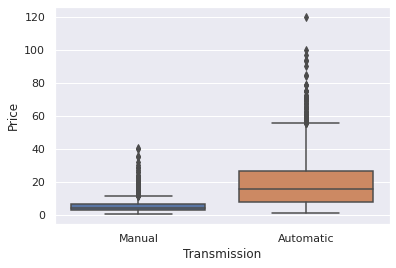

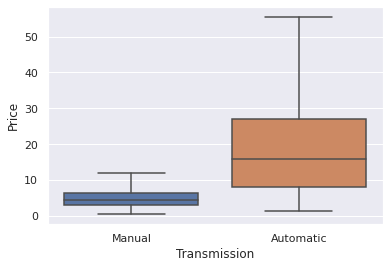

In [540]:
sns.boxplot(data=df6, x='Transmission', y='Price'); plt.show()
sns.boxplot(data=df6, x='Transmission', y='Price', showfliers=False); plt.show()

Clearly, Automatic cars are more expensive than Manual cars. This is especially validating because we know this dataset has more Manual cars than Automatic ones.

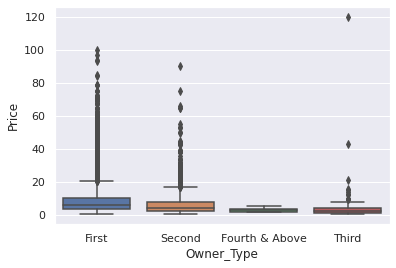

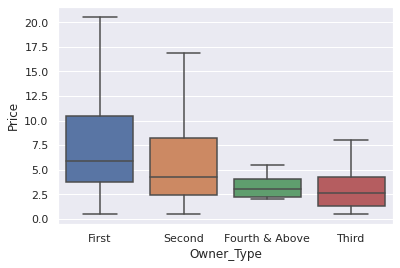

In [541]:
sns.boxplot(data=df6, x='Owner_Type', y='Price'); plt.show()
sns.boxplot(data=df6, x='Owner_Type', y='Price', showfliers = False); plt.show()

The more owners the car has had, the less value it tends to have.

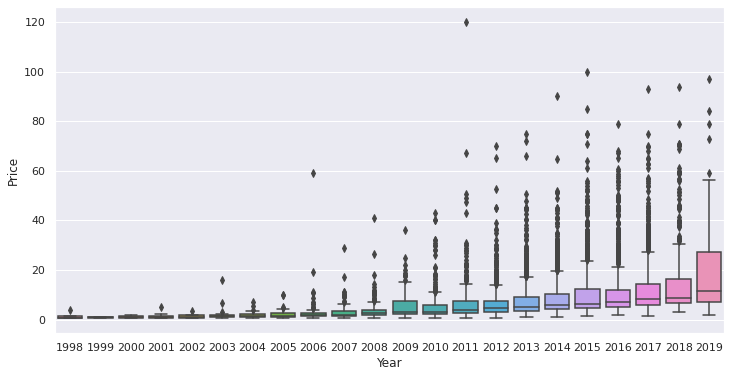

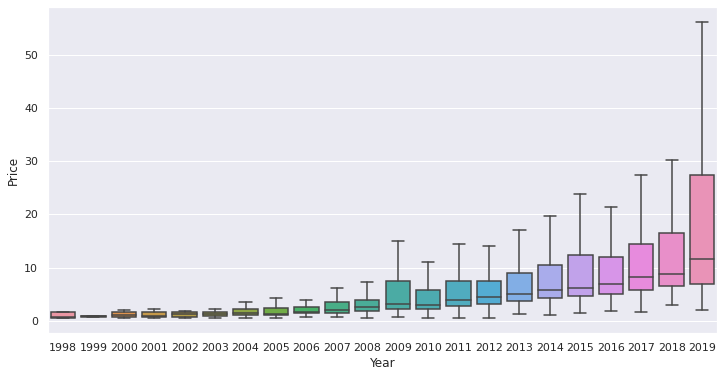

In [583]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df6, x='Year', y='Price'); plt.show()
plt.figure(figsize=(12,6))
sns.boxplot(data=df6, x='Year', y='Price', showfliers = False); plt.show()

The newer the car, the higher its resale value; of course, the price converges below 2007. The newer the car, the higher its range of prices as well. The range specially starts to increase after 2009.

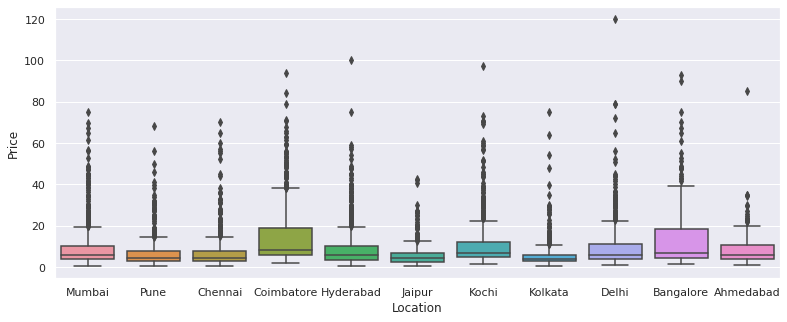

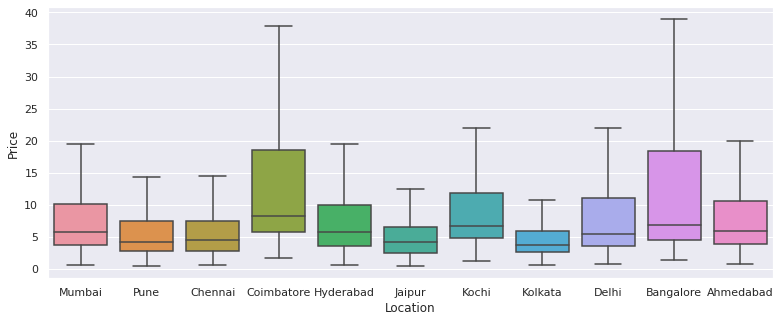

In [542]:
plt.figure(figsize=(13,5))
sns.boxplot(data=df6, x='Location', y='Price'); 
plt.figure(figsize=(13,5))
sns.boxplot(data=df6, x='Location', y='Price', showfliers = False); 

Cars sold in Coimbatore and Bangalore tend to be priced higher than those in other locations.

###Log Distribution

Since Km_Driven, Price and New_Price were highly skewed, let's plot their log transform

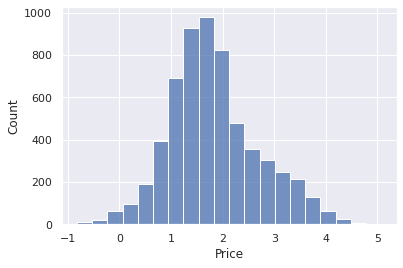

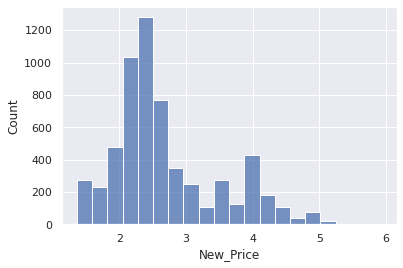

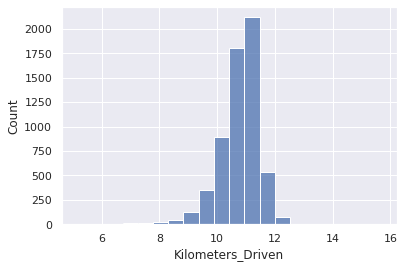

In [543]:
# getting a better sense of the distribution by taking the log, since there are no negative values of price
sns.histplot(np.log(df.Price), bins=20); plt.show()
sns.histplot(np.log(df.New_Price), bins=20); plt.show()
sns.histplot(np.log(df.Kilometers_Driven), bins=20); plt.show()

Price seems to be normally distributed now, New_Price is still right skewed, but Km_Driven has now clearly become slightly left skewed. We shall convert these into log and delete the original columns. Since there are only two Electric cars in the entire dataset, we will delete the two rows since we don't want Mileage to be NaN, and also because Electric car performance is different than other Fuel Types.

In [544]:
ind_electric = df6.loc[:,'Fuel_Type'] == 'Electric'

df6.drop(index=df6[ind_electric].index,axis=0, inplace=True)
del ind_electric

In [545]:
log_cols = ['Kilometers_Driven', 'Price', 'New_Price']
df7 = df6.copy()

for col in log_cols:
    df7[col + '_log'] = np.log(df7[col] + 1)

# drop original columns
df7.drop(log_cols,axis = 1,inplace = True)
df7.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Make,Kilometers_Driven_log,Price_log,New_Price_log
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,Maruti,11.184435,1.011601,1.873339
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,Hyundai,10.621352,2.602690,2.836737
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,Honda,10.736418,1.704748,2.262804
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,Maruti,11.373675,1.945910,2.507157
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,Audi,10.613271,2.930660,3.991573


## Regression Model

Delete the Name column

In [546]:
df7.drop(['Name'], axis=1, inplace=True)

Define our independent and dependent variables

In [547]:
X = df7.drop(['Price_log'], axis=1)
y = df7['Price_log']

In [548]:
# create dummy variables for categorical columns
X = pd.get_dummies(X, columns = X.select_dtypes(include=["object"]).columns.tolist(), drop_first=True,)

X.head()

,Year,Mileage,Engine,Power,Seats,Kilometers_Driven_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Make_Audi,Make_BMW,Make_Bentley,Make_Chevrolet,Make_Datsun,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_ISUZU,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Lamborghini,Make_Land,Make_Mahindra,Make_Maruti,Make_Mercedes-Benz,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Renault,Make_Skoda,Make_Smart,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo
0,2010,26.60,998.0,58.16,5.0,11.184435,1.873339,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,19.67,1582.0,126.20,5.0,10.621352,2.836737,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2011,18.20,1199.0,88.70,5.0,10.736418,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2012,20.77,1248.0,88.76,7.0,11.373675,2.507157,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,2013,15.20,1968.0,140.80,5.0,10.613271,3.991573,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [549]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print(f"Number of data points in train dataset = {x_train.shape[0]}" )
print(f"Number of data points in test dataset = {x_test.shape[0]}" )

Number of data points in train dataset = 4210
Number of data points in test dataset = 1805


In [550]:
regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [551]:
#Coefficients of each column

for i,col in enumerate(x_train.columns):
  print(f"Coefficient of {col} is {regression_model.coef_[i]}")

Coefficient of Year is 0.09297318064732772
Coefficient of Mileage is -0.012226142880185847
Coefficient of Engine is 3.7235506030783294e-05
Coefficient of Power is 0.003949214668210729
Coefficient of Seats is 0.021189112641586558
Coefficient of Kilometers_Driven_log is -0.07260419327403542
Coefficient of New_Price_log is 0.3238349512241743
Coefficient of Location_Bangalore is 0.13460832321029056
Coefficient of Location_Chennai is 0.02929560097950179
Coefficient of Location_Coimbatore is 0.10253652357986548
Coefficient of Location_Delhi is -0.0646123004383638
Coefficient of Location_Hyderabad is 0.0974111498516897
Coefficient of Location_Jaipur is -0.021490542921080963
Coefficient of Location_Kochi is -0.022194203908997845
Coefficient of Location_Kolkata is -0.18396435608127812
Coefficient of Location_Mumbai is -0.050959750605183624
Coefficient of Location_Pune is -0.02704875351920183
Coefficient of Fuel_Type_Diesel is 0.10003949878199798
Coefficient of Fuel_Type_LPG is -0.00164087609171

In [552]:
print(f"Our intercept is {regression_model.intercept_}")

Our intercept is -185.4690700200703


### Check Model Performance

In [553]:
regression_model.score(x_train,y_train)

0.9375965362239768

In [554]:
def check_model_perf(regression_model, y, x):
  prediction = regression_model.predict(x)

  # r2 score
  r2 = regression_model.score(x,y)
  # adjusted r2 score
  n = x.shape[0]
  k = x.shape[1]
  adj_r2_score = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
  # root mean square error
  rmse = np.sqrt(mean_squared_error(y, prediction))
  # mean absolute error
  mae = mean_absolute_error(y, prediction)
  # mape
  mape = np.mean( abs(y - prediction) / y ) * 100

  print(f"r2 score = {round(r2,3)}")
  print(f"Adjusted r2 score = {round(adj_r2_score,3)}")
  print(f"Root Mean Square Error = {round(rmse,3)}")
  print(f"Mean Absolute Error = {round(mae,3)}")
  print(f"Mean Absolute Percentage Error = {round(mape,3)}\n")

print("Training Data")
check_model_perf(regression_model, y_train, x_train)
print("Testing Data")
check_model_perf(regression_model, y_test, x_test)

Training Data
r2 score = 0.938
Adjusted r2 score = 0.937
Root Mean Square Error = 0.187
Mean Absolute Error = 0.136
Mean Absolute Percentage Error = 7.874

Testing Data
r2 score = 0.942
Adjusted r2 score = 0.94
Root Mean Square Error = 0.179
Mean Absolute Error = 0.132
Mean Absolute Percentage Error = 7.643



Observations:

- Train and test R^2 are 0.937 and 0.940; they are consistent with each other, which is good. i.e. model explains 93.7% of the training data variation and 94% of the testing data variation. Model does not seem to be overfitting the data. However, we should also recognize that our initial data set is not big enough to train an accurate model for all the data metrics of which it consists. We would need more data to predict, for example, used prices for Bentley, since currently we only have one row of a Bentley car.

- Our model is able to predict used prices to an error of within 0.132 (MAE) or within 7.64% (MAPE) of the testing data set.

Key Takeaways:

- Used Price is highly correlated with New_Price
- Certain locations have higher priced vehicles
- The newer the vehicle, the higher its resale value
- The less owners a car has, the higher its resale value tends to be
- Automatic cars have a higher resale value than Manual cars
- The model can be relied upon to predict used prices in the current Indian vehicle market, but only to an extent. Recommendation would be to get more data points for each column, and more variety for Fuel Types, Makes, etc.

Notes:
- I have taken some help from the Ratings solution provided in our coursework and used it as a guiding tool.
- One thing I could have done to further improve the model would be to impute missing values grouped by year as well, rather than just by the Make of a car. 